# Neural Network (Feedforward) for heart disease data (low/hight risk)

In [9]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

In [10]:
data_path = os.path.join('..', 'data', 'heart_disease_risk_dataset_earlymed.csv')

df = pd.read_csv(data_path)
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


In [ ]:
scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])

X = df.drop(columns=["Heart_Risk"]).values
y = df["Heart_Risk"].values

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
clf = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(16,8), activation="relu", random_state=42, max_iter=200)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 8), random_state=42)

In [13]:
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9937857142857143
Test Accuracy: 0.9925
Confusion Matrix:
 [[6953   47]
 [  58 6942]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7000
         1.0       0.99      0.99      0.99      7000

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [14]:
pca: PCA = PCA(n_components=2)

X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.fit_transform(X_test)

clf_2d = MLPClassifier()
clf.fit(X_train_2d, y_train)

x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))


[0.33407997 0.0927898 ]


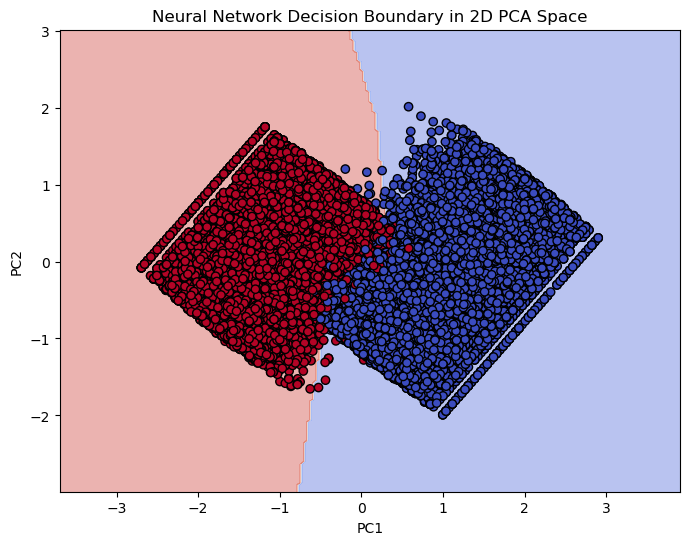

In [17]:
# Suppose you have your original data as X_train, y_train
# and you want to project it down to 2D:
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(X_train)

# Train a simple MLP on the 2D data
clf_2d = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
clf_2d.fit(x_train_2d, y_train)

# Create a meshgrid covering the range of the 2D data
x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Flatten the grid so we can feed it to the classifier
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class for each point in the grid
Z = clf_2d.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary with contourf
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

explained_var = pca.explained_variance_ratio_
print(explained_var)

# Plot the training points
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Neural Network Decision Boundary in 2D PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# Mathematical Analysis of the Feedforward Neural Network

A feedforward **Neural Network** is conceptually not that complex as the name might indicate. You could say that a Neural Network is just a fancy squiggle fitting machine, just like a linear function, but instead of a line, you get a weird shape that fits to the data.

### Forward Pass
A Neural Network starts with a **forward pass**. The model first processes the input. At each layer, the model computes a weighted sum of the inputs, adds a bias, and then applies an  **activation function**. The activation function will produce an output. For our purpose, we used a basic ReLU activation function.

**ReLU: f(x) = max(0,x)**

Then, the Neural Network may or may not add another bias and apply some weights to these outputs, and even add a function to combine all outcomes from all inputs in some way. Finally a result is returned by the Neural Network.

### Loss
After the forward pass, the network calculates the loss. Chances are very small that the model got the weights optimised instantly. To calculate the loss, it calculates the difference between the predicted output and the actual target value. Since we have a binary classifier, we use **binary cross-entropy loss**, or simply log loss.

$$
\text{loss}(q) = - \sum_{x \in X_Pos} \log\,q_x(Pos) \;-\; \sum_{x \in X_Neg} \log\,q_x(Neg)
$$

### Backpropagation
Since the network can now compute the loss for each output for some given input, it can start backpropagating. Using backpropagation, the network computes the gradient (the derivative) of the loss function with respect to each of the network's parameters (weights and biases). This is done using the chain rule of calculus, which propagates the error backword through the network.

$$
\frac{\partial \ell}{\partial \text{input}}
\;=\;
\frac{\partial \ell}{\partial \text{output}}
\;\cdot\;
\frac{\partial \text{output}}{\partial \text{input}}
$$

### Updating Weights and Biases
Once the gradients are computed, an optimisation algorithm updates the weights and biases in the opposite direction of the gradient. In our case, we use Adam. The update rule typically looks like the following:

$$
\theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla_{\theta} L
$$

**Where:**

$$
\begin{aligned}
\theta &:\; \text{Model parameters (e.g., weights, biases)} \\
\theta_{\text{old}} &:\; \text{Parameter values before the update} \\
\theta_{\text{new}} &:\; \text{Parameter values after the update} \\
\eta &:\; \text{Learning rate, controlling the step size} \\
\nabla_{\theta} L &:\; \text{Gradient of the loss function with respect to the parameters}
\end{aligned}
$$

Imagine the loss surface like a mountain upside down. Therefore, we need to go in the opposite direction of the gradient.

### Iterate the Process
This whole process (forward pass, loss calculations, backpropagation, and parameter updates) is repeated for many iterations until the loss converges or the limit of iterations has been reached. Luckily for us, these steps are implemented internall in scikit-learn's MLPClassifier. We only call the .fit() function as a user. Sci-Kit learn does the computing and parameter tuning.

# How does the NN work?
Like mentioned earlier, the Neural Network is a squiggle fitting machine, rather than a regular function. It is non-linear, and it can take on very complex shapes. It can capture features that other machine learning models might miss. Also, since the Neural Network has the ability to calculate the loss across multiple layers, the Neural Network could potentially converge to a more optimal solution.
